In [8]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [25]:
import wget

url = 'https://raw.githubusercontent.com/GauravSahu13/ZomatoRestaurantRatingPrediction/main/notebook/data/zomato_cleaned.xls'
wget.download(url, 'zomato_cleaned.csv')

# Load csv file
df = pd.read_csv('zomato_cleaned.csv')
df.head()

,Name,Takes online orders?,Has table booking?,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City,Ratings_null
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,0
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,0
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,0
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,0


In [27]:
X = df.drop(columns=['Ratings','Ratings_null','Name'],axis=1)
y = df['Ratings']

In [28]:
X.head()

,Takes online orders?,Has table booking?,Votes,Rest_Type,Cuisines,Cost,Type,City
0,Yes,Yes,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [29]:
print("Categories in 'online orders?' variable:     ",end=" " )
print(df['Takes online orders?'].unique())
print('\n')

print("Categories in 'table booking?' variable:  ",end=" ")
print(df['Has table booking?'].unique())
print('\n')

print("Categories in'Restaurant Type' variable:",end=" " )
print(df['Rest_Type'].unique())
print('\n')

print("Categories in 'Cuisines' variable:     ",end=" " )
print(df['Cuisines'].unique())
print('\n')

print("Categories in 'Type' variable:     ",end=" " )
print(df['Type'].unique())
print('\n')

print("Categories in 'City' variable:     ",end=" " )
print(df['City'].unique())
print('\n')

Categories in 'online orders?' variable:      ['Yes' 'No']


Categories in 'table booking?' variable:   ['Yes' 'No']


Categories in'Restaurant Type' variable: ['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor' 'Bakery, Dessert Parlor' 'Pub' 'Bakery'
 'Takeaway, Delivery' 'Fine Dining' 'Beverage Shop' 'Sweet Shop' 'Bar'
 'Beverage Shop, Quick Bites' 'Confectionery' 'Quick Bites, Beverage Shop'
 'Dessert Parlor, Sweet Shop' 'Bakery, Quick Bites'
 'Sweet Shop, Quick Bites' 'Kiosk' 'Food Truck'
 'Quick Bites, Dessert Parlor' 'Beverage Shop, Dessert Parlor' 'Takeaway'
 'Pub, Casual Dining' 'Casual Dining, Bar' 'Dessert Parlor, Beverage Shop'
 'Quick Bites, Bakery' 'Dessert Parlor, Quick Bites'
 'Microbrewery, Casual Dining' 'Lounge' 'Bar, Casual Dining' 'Food Court'
 'Cafe, Bakery' 'Unknown' 'Dhaba' 'Quick Bites, Sweet Shop' 'Microbrewery'
 'Food Court, Quick Bites' 'Pub, Bar' 'Casua

In [30]:
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51588    3.6
51589    3.7
51590    3.7
51591    4.3
51592    3.4
Name: Ratings, Length: 51593, dtype: float64

In [31]:
def one_hot_encode(string: str):
    if string.lower()=='yes':
        return 1
    elif string.lower()=='no':
        return 0


X['Takes online orders?']=X['Takes online orders?'].apply(one_hot_encode)
X['Has table booking?']=X['Has table booking?'].apply(one_hot_encode)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
objList = X.select_dtypes(include = "object").columns
print (objList)
for feat in objList:
    X[feat] = le.fit_transform(X[feat].astype(str))

X.head()

Index(['Rest_Type', 'Cuisines', 'Type', 'City'], dtype='object')


,Takes online orders?,Has table booking?,Votes,Rest_Type,Cuisines,Cost,Type,City
0,1,1,775,27,2159,800.0,0,1
1,1,0,787,27,952,800.0,0,1
2,1,0,918,22,766,800.0,0,1
3,0,0,88,78,2555,300.0,0,1
4,0,0,166,27,2188,600.0,0,1


In [33]:
df['target']=0 # declare a column named target

In [34]:
df['target'][df['Ratings']>=3.8]=1; # target is equal to 1 if the corresponding rate is >= 3.8
df['target'][df['Ratings']<3.8]=0; # target is equal to 0 if the corresponding rate is < 3.8
y=df['target']
y

<ipython-input-34-387a43c42e9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'][df['Ratings']>=3.8]=1; # target is equal to 1 if the corresponding rate is >= 3.8
<ipython-input-34-387a43c42e9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'][df['Ratings']<3.8]=0; # target is equal to 0 if the corresponding rate is < 3.8


0        1
1        1
2        1
3        0
4        1
        ..
51588    0
51589    0
51590    0
51591    1
51592    0
Name: target, Length: 51593, dtype: int64

In [35]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((36115, 8), (15478, 8))

In [36]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [37]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.4147
- Mean Absolute Error: 0.3584
- R2 Score: 0.2777
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4154
- Mean Absolute Error: 0.3595
- R2 Score: 0.2764


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4306
- Mean Absolute Error: 0.3885
- R2 Score: 0.2214
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4316
- Mean Absolute Error: 0.3893
- R2 Score: 0.2190


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.4147
- Mean Absolute Error: 0.3584
- R2 Score: 0.2777
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4154
- Mean Absolute Error: 0.3595
- R2 Score: 0.2764


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1735
- Mean Absolute Error: 0.0625
- R2 Score: 0.8736
-----------------------

In [38]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.884068
4,Decision Tree,0.815880
3,K-Neighbors Regressor,0.783049
6,XGBRegressor,0.758507
7,CatBoosting Regressor,0.704342
8,AdaBoost Regressor,0.503888
0,Linear Regression,0.276400
2,Ridge,0.276399
1,Lasso,0.219018


##### Here we can use Random Forest for Hyper Parameter Tuning


In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 2)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.35


In [40]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test,y_pred,squared=False)
mae = metrics.mean_absolute_error(y_test, y_pred)
medae = metrics.median_absolute_error(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Median Absolute Error (MEDAE): {medae}")
print(f'Test variance: {np.var(y_test)}')

Mean Squared Error (MSE): 0.02778152123323163
Root Mean Squared Error (RMSE): 0.16667789665469032
Mean Absolute Error (MAE): 0.07263682861696172
Median Absolute Error (MEDAE): 0.0
Test variance: 0.238525352107667


In [41]:
residuals = y_test - y_pred


In [42]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':residuals})
pred_df

,Actual Value,Predicted Value,Difference
45646,0,0.39,-0.39
41541,1,0.75,0.25
5488,1,0.99,0.01
44373,0,0.24,-0.24
2247,1,1.00,0.00
...,...,...,...
32056,0,0.00,0.00
26800,0,0.01,-0.01
32976,0,0.00,0.00
21610,0,0.00,0.00


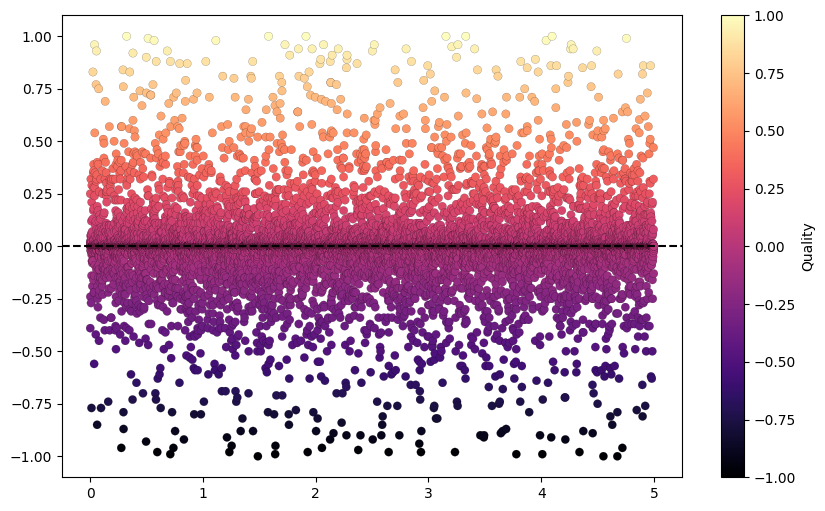

In [43]:
# Generate x-values with the same size as residuals
x_values = np.linspace(0, 5, len(residuals))

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# Plot the residuals
plt.scatter(x_values, residuals, c=residuals, cmap='magma', edgecolors='black', linewidths=0.1)
plt.colorbar(label="Quality", orientation="vertical")

# Plot a horizontal line at y = 0
plt.axhline(y=0, color='black', linestyle='--')

plt.show()

A residual is the difference between the observed value of the target and the predicted value. The closer the residual is to 0, the better job our model is doing.

In [44]:
print(f"Error range: {residuals.max()-residuals.min()}")

Error range: 2.0


#### So our prediction's error range is around 2.0

In [47]:
'''from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rf2 = RandomForestRegressor(random_state=2)

rf_rscv = RandomizedSearchCV(estimator=rf2, param_distributions=random_grid,\
                             n_iter = 100, cv = 3, verbose=2, random_state=2, n_jobs = -1)
rf_rscv.fit(X_train,y_train)
print(rf_rscv.best_params_)'''

"from sklearn.model_selection import RandomizedSearchCV\n\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]\nmax_features = ['auto', 'sqrt']\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\nmin_samples_split = [2, 5, 10]\nmin_samples_leaf = [1, 2, 4]\nbootstrap = [True, False]\n\nrandom_grid = {'n_estimators': n_estimators,\n                'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n                'min_samples_leaf': min_samples_leaf,\n              'bootstrap': bootstrap}\n\nrf2 = RandomForestRegressor(random_state=2)\n\nrf_rscv = RandomizedSearchCV(estimator=rf2, param_distributions=random_grid,                             n_iter = 100, cv = 3, verbose=2, random_state=2, n_jobs = -1)\nrf_rscv.fit(X_train,y_train)\nprint(rf_rscv.best_params_)"

In [48]:
rf_random = RandomForestRegressor(
      n_estimators= 600,
      min_samples_split= 5,
      min_samples_leaf= 1,
      max_depth = 10,
      max_features='sqrt',
      bootstrap= True,
      random_state=2) # Best RandomizedSearch parameters

rf_random.fit(X_train,y_train)
random_pred = rf_random.predict(X_test)

In [49]:
random_mse = metrics.mean_squared_error(y_test, random_pred)
random_rmse = metrics.mean_squared_error(y_test, random_pred, squared=False)
random_mae = metrics.mean_absolute_error(y_test, random_pred)
random_medae = metrics.median_absolute_error(y_test, random_pred)

print(f"Mean Squared Error (MSE): {random_mse}")
print(f"Root Mean Squared Error (RMSE): {random_rmse}")
print(f"Mean Absolute Error (MAE): {random_mae}")
print(f"Median Absolute Error (MEDAE): {random_medae}")
print(f'Test variance: {np.var(y_test)}')

Mean Squared Error (MSE): 0.08582061973223344
Root Mean Squared Error (RMSE): 0.29295156550568807
Mean Absolute Error (MAE): 0.19830595668422593
Median Absolute Error (MEDAE): 0.09740206444129781
Test variance: 0.238525352107667


In [50]:
print('Improvements:')
print(f"Mean Squared Error (MSE):       {mse} => {random_mse}")
print(f"Root Mean Squared Error (RMSE): {rmse} => {random_rmse}")
print(f"Mean Absolute Error (MAE):      {mae} => {random_mae}")
print(f"Median Absolute Error (MEDAE):  {mae} => {random_medae}")
print(f'Test variance: {np.var(y_test)}')

Improvements:
Mean Squared Error (MSE):       0.02778152123323163 => 0.08582061973223344
Root Mean Squared Error (RMSE): 0.16667789665469032 => 0.29295156550568807
Mean Absolute Error (MAE):      0.07263682861696172 => 0.19830595668422593
Median Absolute Error (MEDAE):  0.07263682861696172 => 0.09740206444129781
Test variance: 0.238525352107667


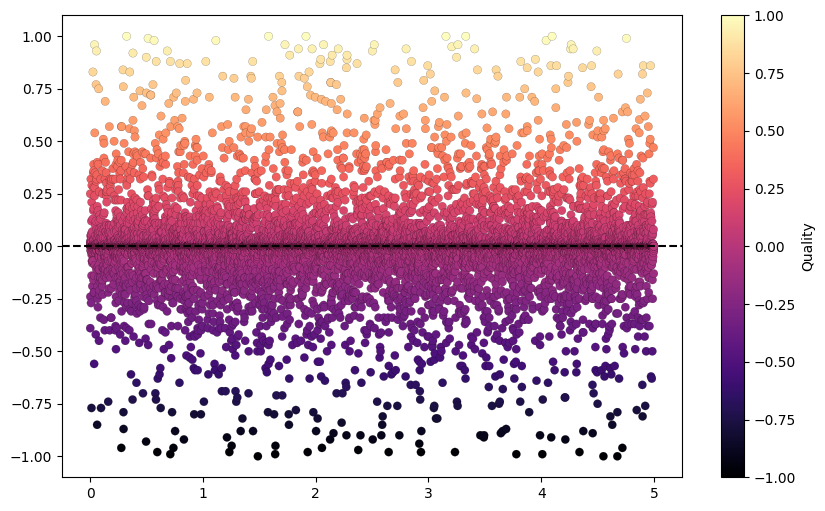

In [51]:
f_residuals = y_test - random_pred
# Generate x-values with the same size as residuals
x_values = np.linspace(0, 5, len(f_residuals))

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# Plot the residuals
plt.scatter(x_values, residuals, c=residuals, cmap='magma', edgecolors='black', linewidths=0.1)
plt.colorbar(label="Quality", orientation="vertical")

# Plot a horizontal line at y = 0
plt.axhline(y=0, color='black', linestyle='--')

plt.show()

In [52]:
print(f"Errors range of first model: {residuals.max() - residuals.min()}")
print(f"Errors range of second model: {f_residuals.max() - f_residuals.min()}")
print(f"Error difference of models: {(residuals.max() - residuals.min()) - (f_residuals.max() - f_residuals.min())}")

Errors range of first model: 2.0
Errors range of second model: 1.9586959155609596
Error difference of models: 0.041304084439040434


#### When compared to the previous model (with default hyperparameters), our final model has a 4.3 % reduction in range of error.